In [71]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [72]:
import torch
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM

In [73]:
import torch.nn as nn
import torch.optim as optim

In [74]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [75]:
pd.set_option("display.max_columns", None)

# 1. Load Data

In [76]:
traffic = pd.read_csv('traffic.csv', index_col=None,parse_dates=True)

In [77]:
#check data
traffic.shape

(192720, 40)

In [78]:
traffic.dtypes

Unnamed: 0               int64
startDatetime           object
siteRef                  int64
direction              float64
count                  float64
X                      float64
Y                      float64
OBJECTID                 int64
lane                    object
type                    object
percentHeavy           float64
description             object
acceptedDays           float64
AADT5yearsAgo          float64
AADT4yearsAgo          float64
AADT3yearsAgo          float64
AADT2yearsAgo          float64
AADT1yearAgo           float64
siteType                object
date                    object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Dew Point              float64
Relative Humidity      float64
Wind Speed             float64
Precipitation          float64
Precipitation Cover    float64
Visibility             float64
Cloud Cover            float64
Sea Level Pressure     float64
Conditio

In [79]:
#check types
traffic.isna().sum()

Unnamed: 0             0
startDatetime          0
siteRef                0
direction              0
count                  0
X                      0
Y                      0
OBJECTID               0
lane                   0
type                   0
percentHeavy           0
description            0
acceptedDays           0
AADT5yearsAgo          0
AADT4yearsAgo          0
AADT3yearsAgo          0
AADT2yearsAgo          0
AADT1yearAgo           0
siteType               0
date                   0
Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Wind Speed             0
Precipitation          0
Precipitation Cover    0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Conditions             0
Hol_type               0
day                    0
time                   0
month                  0
hour                   0
dayOfweek              0
year                   0


In [80]:
traffic['startDatetime']=pd.to_datetime(traffic['startDatetime'])

traffic['date']=pd.to_datetime(traffic['date'])

traffic['time'] = pd.to_datetime(traffic['time'])


In [81]:
traffic.dtypes

Unnamed: 0                      int64
startDatetime          datetime64[ns]
siteRef                         int64
direction                     float64
count                         float64
X                             float64
Y                             float64
OBJECTID                        int64
lane                           object
type                           object
percentHeavy                  float64
description                    object
acceptedDays                  float64
AADT5yearsAgo                 float64
AADT4yearsAgo                 float64
AADT3yearsAgo                 float64
AADT2yearsAgo                 float64
AADT1yearAgo                  float64
siteType                       object
date                   datetime64[ns]
Date time                      object
Minimum Temperature           float64
Maximum Temperature           float64
Temperature                   float64
Dew Point                     float64
Relative Humidity             float64
Wind Speed  

In [82]:
traffic=traffic.set_index('startDatetime')

# 2.  Pre-processing
- make it numerical

In [83]:
traffic.head()

,Unnamed: 0,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
startDatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0,1610011,1.0,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-15 00:00:00,1,0,0,2018
2018-01-01 01:00:00,1,1610011,1.0,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-15 01:00:00,1,1,0,2018
2018-01-01 02:00:00,2,1610011,1.0,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-15 02:00:00,1,2,0,2018
2018-01-01 03:00:00,3,1610011,1.0,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-15 03:00:00,1,3,0,2018
2018-01-01 04:00:00,4,1610011,1.0,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-15 04:00:00,1,4,0,2018


In [84]:
#encode lane and hol_type
#target is count


In [85]:
traffic.columns

Index(['Unnamed: 0', 'siteRef', 'direction', 'count', 'X', 'Y', 'OBJECTID',
       'lane', 'type', 'percentHeavy', 'description', 'acceptedDays',
       'AADT5yearsAgo', 'AADT4yearsAgo', 'AADT3yearsAgo', 'AADT2yearsAgo',
       'AADT1yearAgo', 'siteType', 'date', 'Date time', 'Minimum Temperature',
       'Maximum Temperature', 'Temperature', 'Dew Point', 'Relative Humidity',
       'Wind Speed', 'Precipitation', 'Precipitation Cover', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Conditions', 'Hol_type', 'day',
       'time', 'month', 'hour', 'dayOfweek', 'year'],
      dtype='object')

# 3. Set Features and Target

In [86]:
#Features
#features - all but objectid, type, description, accepteddays

feature_columns = ['siteRef','X', 'Y','year',
        'lane', 'percentHeavy', 'AADT5yearsAgo', 'AADT4yearsAgo', 'AADT3yearsAgo',
       'AADT2yearsAgo', 'AADT1yearAgo',
       'Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Wind Speed', 'Precipitation',
       'Precipitation Cover', 'Visibility', 'Cloud Cover',
       'Sea Level Pressure', 'Hol_type','day','month', 'hour',
       'dayOfweek', 'Conditions']
X = pd.DataFrame(traffic[feature_columns])


In [87]:
X

,siteRef,X,Y,year,lane,percentHeavy,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Hol_type,day,month,hour,dayOfweek,Conditions
startDatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1610011,174.654029,-36.858365,2018,Inc,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,PublicHoliday,1,1,0,0,"Rain, Overcast"
2018-01-01 01:00:00,1610011,174.654029,-36.858365,2018,Inc,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,PublicHoliday,1,1,1,0,"Rain, Overcast"
2018-01-01 02:00:00,1610011,174.654029,-36.858365,2018,Inc,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,PublicHoliday,1,1,2,0,"Rain, Overcast"
2018-01-01 03:00:00,1610011,174.654029,-36.858365,2018,Inc,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,PublicHoliday,1,1,3,0,"Rain, Overcast"
2018-01-01 04:00:00,1610011,174.654029,-36.858365,2018,Inc,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,PublicHoliday,1,1,4,0,"Rain, Overcast"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,1659011,174.654032,-36.858004,2019,Ramp,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,SchoolHoliday,31,12,19,1,Partially cloudy
2019-12-31 20:00:00,1659011,174.654032,-36.858004,2019,Ramp,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,SchoolHoliday,31,12,20,1,Partially cloudy
2019-12-31 21:00:00,1659011,174.654032,-36.858004,2019,Ramp,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,SchoolHoliday,31,12,21,1,Partially cloudy


In [88]:
# create dummy variables for the lane column
# Getting dummies for categorical columns
X_dummy = pd.get_dummies(X, columns=['lane', 'Hol_type', 'Conditions', 'siteRef'], drop_first=True)

In [89]:
X_dummy

,X,Y,year,percentHeavy,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,day,month,hour,dayOfweek,lane_Inc,lane_Ramp,Hol_type_SchoolDay,Hol_type_SchoolHoliday,Hol_type_Weekend,Conditions_Overcast,Conditions_Partially cloudy,Conditions_Rain,"Conditions_Rain, Overcast","Conditions_Rain, Partially cloudy",siteRef_1610013,siteRef_1620011,siteRef_1620013,siteRef_1630013,siteRef_1640011,siteRef_1650011,siteRef_1650013,siteRef_1659011,siteRef_1660011,siteRef_1660013
startDatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,174.654029,-36.858365,2018,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-01-01 01:00:00,174.654029,-36.858365,2018,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-01-01 02:00:00,174.654029,-36.858365,2018,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,1,1,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-01-01 03:00:00,174.654029,-36.858365,2018,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,1,1,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-01-01 04:00:00,174.654029,-36.858365,2018,8.4,37636.0,39823.0,40574.0,37891.0,39148.0,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,1,1,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,174.654032,-36.858004,2019,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,31,12,19,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2019-12-31 20:00:00,174.654032,-36.858004,2019,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,31,12,20,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2019-12-31 21:00:00,174.654032,-36.858004,2019,10.6,6721.0,7304.0,7192.0,6243.0,6381.0,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,31,12,21,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
y = traffic['count']

In [91]:
y.shape

(192720,)

In [92]:
X_dummy.dtypes

X                                    float64
Y                                    float64
year                                   int64
percentHeavy                         float64
AADT5yearsAgo                        float64
AADT4yearsAgo                        float64
AADT3yearsAgo                        float64
AADT2yearsAgo                        float64
AADT1yearAgo                         float64
Minimum Temperature                  float64
Maximum Temperature                  float64
Temperature                          float64
Dew Point                            float64
Relative Humidity                    float64
Wind Speed                           float64
Precipitation                        float64
Precipitation Cover                  float64
Visibility                           float64
Cloud Cover                          float64
Sea Level Pressure                   float64
day                                    int64
month                                  int64
hour      

In [93]:
#sns.set(rc={'figure.figsize':(50,50)})

In [94]:
#X_dummy['time'] = pd.to_datetime(X_dummy['time'])

In [95]:
#sns.pairplot(traffic)

In [96]:
traffic.corr()

,Unnamed: 0,siteRef,direction,count,X,Y,OBJECTID,percentHeavy,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,day,month,hour,dayOfweek,year
Unnamed: 0,1.000000,8.983025e-01,0.813165,-0.452371,-7.440942e-02,7.565099e-02,8.739809e-01,4.237957e-01,4.962222e-02,-7.581141e-01,-7.579241e-01,-7.510560e-01,-7.784540e-01,-7.847468e-01,-3.251683e-02,-3.709568e-02,-3.589296e-02,-4.435491e-02,-2.113754e-02,1.713024e-02,-7.913950e-03,-2.144410e-03,-2.866898e-03,-1.928226e-02,-1.624126e-05,8.442305e-03,8.843375e-02,2.429240e-04,6.297061e-04,1.537097e-01
siteRef,0.898303,1.000000e+00,0.872674,-0.400633,1.433610e-01,-1.430337e-01,9.894280e-01,4.093432e-01,-9.160759e-03,-6.767264e-01,-6.702604e-01,-6.618795e-01,-7.042910e-01,-7.156952e-01,-1.789768e-15,-4.370686e-16,1.618370e-15,1.736459e-15,-2.496139e-16,6.324853e-16,-5.065671e-16,-2.364134e-15,-3.643917e-16,7.329761e-16,2.991308e-16,-4.218372e-16,-6.139379e-15,0.000000e+00,-3.532809e-17,5.911559e-18
direction,0.813165,8.726740e-01,1.000000,-0.451038,1.616689e-01,-1.470675e-01,8.868729e-01,1.005048e-01,-2.834681e-01,-7.569070e-01,-7.536740e-01,-7.482785e-01,-7.800876e-01,-7.899972e-01,8.353773e-03,8.444760e-03,8.926066e-03,6.098674e-03,-7.528175e-03,2.034387e-03,-1.274261e-03,-4.478641e-03,4.346025e-04,-6.621795e-03,-1.018828e-03,4.827087e-03,5.606827e-03,-1.976400e-05,1.877111e-03,4.473039e-02
count,-0.452371,-4.006331e-01,-0.451038,1.000000,1.015714e-01,-1.103388e-01,-4.104797e-01,3.757619e-03,2.316584e-01,5.980689e-01,5.994414e-01,5.994361e-01,5.984577e-01,5.976738e-01,-8.810406e-03,-5.535536e-03,-8.748237e-03,-1.313265e-02,-1.068067e-02,-3.601433e-04,-1.287242e-02,-1.281620e-04,7.062888e-03,-1.465277e-02,2.333370e-03,1.502717e-04,1.420708e-02,2.027048e-01,-5.511211e-02,6.765572e-03
X,-0.074409,1.433610e-01,0.161669,0.101571,1.000000e+00,-9.990110e-01,7.597515e-02,2.047558e-01,-6.695111e-03,1.337985e-01,1.605246e-01,1.678616e-01,1.428954e-01,1.356573e-01,-1.319573e-14,8.635215e-15,-1.636605e-15,3.647731e-15,-5.779882e-16,-1.867514e-15,4.006110e-16,-2.503112e-15,7.307201e-16,-6.210865e-16,6.582425e-16,-5.692798e-15,3.969557e-15,0.000000e+00,-3.004730e-16,0.000000e+00
Y,0.075651,-1.430337e-01,-0.147068,-0.110339,-9.990110e-01,1.000000e+00,-7.213623e-02,-2.290136e-01,-2.314552e-02,-1.476399e-01,-1.750875e-01,-1.828679e-01,-1.575431e-01,-1.502435e-01,1.010594e-15,-1.736299e-14,2.389165e-16,1.440031e-15,3.710582e-16,8.971231e-16,-6.937435e-16,-3.673667e-15,1.682549e-16,-1.555137e-16,-1.186980e-15,4.335067e-15,-2.527561e-14,0.000000e+00,-3.548044e-16,0.000000e+00
OBJECTID,0.873981,9.894280e-01,0.886873,-0.410480,7.597515e-02,-7.213623e-02,1.000000e+00,3.239364e-01,-6.231666e-02,-6.895941e-01,-6.860729e-01,-6.792110e-01,-7.212248e-01,-7.326337e-01,-8.704813e-16,2.194018e-15,8.767011e-16,1.063216e-15,-3.823468e-16,2.659734e-16,-9.351877e-16,-7.354906e-15,-8.322967e-16,-1.765946e-16,1.551540e-16,2.742519e-16,8.267951e-15,0.000000e+00,4.232555e-17,2.679758e-17
percentHeavy,0.423796,4.093432e-01,0.100505,0.003758,2.047558e-01,-2.290136e-01,3.239364e-01,1.000000e+00,5.615131e-01,3.425235e-03,6.900820e-03,1.394793e-02,-1.398136e-02,-2.037924e-02,5.800915e-16,-5.739693e-15,3.224907e-15,3.309386e-15,9.553658e-16,-1.166407e-16,-6.326285e-17,2.980754e-15,-1.570124e-16,-4.093408e-16,-3.517513e-16,9.874561e-17,-1.255894e-14,3.782230e-21,2.907580e-17,-1.629459e-17
acceptedDays,0.049622,-9.160759e-03,-0.283468,0.231658,-6.695111e-03,-2.314552e-02,-6.231666e-02,5.615131e-01,1.000000e+00,3.792580e-01,3.862177e-01,3.938105e-01,3.738832e-01,3.730645e-01,4.149165e-16,6.376682e-16,-4.068305e-16,-2.388018e-16,2.432435e-16,4.090891e-16,1.522954e-15,-2.485928e-15,9.962171e-17,6.379492e-16,6.573057e-16,-3.253292e-17,4.583508e-15,2.653455e-17,1.004623e-16,-4.690498e-18
AADT5yearsAgo,-0.758114,-6.767264e-01,-0.756907,0.59806

# 4. Baseline Model - Linear Regression

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummy)

In [98]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [99]:
# Create a model for Linear Regression
model = LinearRegression()

# Fit the model with the Training data
training_model = model.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
trainingR2=model.fit(X_train, y_train).score(X_train, y_train)

# Calculate the score (R^2 for Regression) for Testing Data
testR2=model.fit(X_test, y_test).score(X_test, y_test)
testR2

0.4135410819403941

# 5. Random Forest Model

In [69]:

# Instantiate a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"root Mean Squared Error: {rmse:.4f}")

root Mean Squared Error: 371.0982


# 6. KNeighbour Regressor

In [70]:
# Instantiate a k-Nearest Neighbors regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the performance of the model
rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
print(f"root Mean Squared Error: {rmse:.4f}")

root Mean Squared Error: 497.6603


In [34]:

# Perform cross-validation with 10 folds
scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Print the average mean squared error (MSE) and standard deviation of the scores
print('MSE:', -scores.mean())
print('Standard deviation:', scores.std())

MSE: 292329.04752484185
Standard deviation: 6723.2920973286455


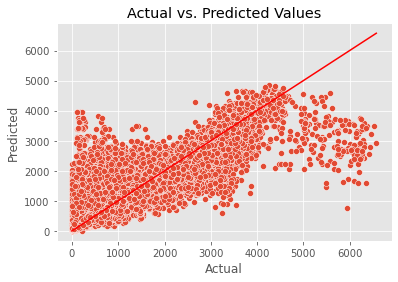

In [35]:
# Create a dataframe with the actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

# Create a scatterplot of the actual vs predicted values
sns.scatterplot(x='Actual', y='Predicted', data=df_results)

# Add a line representing perfect prediction (actual = predicted)
sns.lineplot(x=[df_results.min().min(), df_results.max().max()], y=[df_results.min().min(), df_results.max().max()], color='red')

# Add axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()

In [ ]:
# Define the hyperparameters to tune and the parameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and mean squared error (MSE) of the best estimator
print('Best hyperparameters:', grid_search.best_params_)
print('Best MSE:', -grid_search.best_score_)

# Evaluate the best estimator on a hold-out test set

y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)



In [ ]:
ypred_knn_gridsearchAll =grid_search.best_estimator_.predict(X_dummy)

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(30,10))
plt.plot(y[:300], label="Actual")
plt.plot(ypred_knn_gridsearchAll[:300], label="Predicted")
plt.legend()
plt.show()

# 6.1 PCA

In [ ]:
# Create an instance of PCA
pca = PCA(n_components=5)

# Fit Xs
pca.fit(X_dummy)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# ANSWER
# Plot explained_variance_
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:

# Apply dimensionality reduction to Xs using transform
X_pca = pca.transform(X_dummy)

In [ ]:
# Create PairPlot of PCA
sns.pairplot(pd.DataFrame(X_pca))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate a k-Nearest Neighbors regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# 7. GRU

In [ ]:
y.shape

In [103]:
# Add a new dimension to the data
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [109]:
# Define model architecture
gru = Sequential()
gru.add(GRU(32, input_shape=(X_train.shape[1], 1)))
gru.add(Dense(1))

# Compile model
gru.compile(loss='mean_squared_error', optimizer='adam')

# Fit model on training data
gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate model on test data
score = gru.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

# Make predictions on test data
y_pred = gru.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.4f}")
print()

Epoch 1/50
4818/4818 [==============================] - 65s 13ms/step - loss: 1720921.7500
Epoch 2/50
4818/4818 [==============================] - 58s 12ms/step - loss: 1477982.0000
Epoch 3/50
4818/4818 [==============================] - 59s 12ms/step - loss: 1284087.6250
Epoch 4/50
4818/4818 [==============================] - 56s 12ms/step - loss: 1137325.7500
Epoch 5/50
4818/4818 [==============================] - 57s 12ms/step - loss: 1036607.1250
Epoch 6/50
4818/4818 [==============================] - 59s 12ms/step - loss: 976967.3125
Epoch 7/50
4818/4818 [==============================] - 60s 13ms/step - loss: 950776.5625
Epoch 8/50
4818/4818 [==============================] - 59s 12ms/step - loss: 943125.8125
Epoch 9/50
4818/4818 [==============================] - 59s 12ms/step - loss: 941624.0000
Epoch 10/50
4818/4818 [==============================] - 61s 13ms/step - loss: 941361.9375
Epoch 11/50
4818/4818 [==============================] - 69s 14ms/step - loss: 816748.4375
Epo

In [ ]:
X_train.shape

In [108]:
n_steps = 44
n_features = 1


# Build LSTM model
lstm= Sequential()
lstm.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate LSTM model on test data
score = lstm.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)


# Make predictions using LSTM model
y_pred = lstm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.4f}")
print()

Epoch 1/50
4818/4818 [==============================] - 84s 17ms/step - loss: 1885150.3750
Epoch 2/50
4818/4818 [==============================] - 86s 18ms/step - loss: 1868973.0000
Epoch 3/50
4818/4818 [==============================] - 86s 18ms/step - loss: 158780030976.0000
Epoch 4/50
4818/4818 [==============================] - 82s 17ms/step - loss: 1848486.8750
Epoch 5/50
4818/4818 [==============================] - 85s 18ms/step - loss: 1387549.1250
Epoch 6/50
4818/4818 [==============================] - 84s 17ms/step - loss: 622666.7500
Epoch 7/50
4818/4818 [==============================] - 95s 20ms/step - loss: 593456.6250
Epoch 8/50
4818/4818 [==============================] - 97s 20ms/step - loss: 569915.6250
Epoch 9/50
4818/4818 [==============================] - 100s 21ms/step - loss: 630916.2500
Epoch 10/50
4818/4818 [==============================] - 86s 18ms/step - loss: 526095.6250
Epoch 11/50
4818/4818 [==============================] - 85s 18ms/step - loss: 473915.31